In [1]:
!pip install spacy==3.0.6

     |████████████████████████████████| 12.8 MB 4.4 MB/s 
     |████████████████████████████████| 9.1 MB 24.8 MB/s 
     |████████████████████████████████| 628 kB 48.6 MB/s 
     |████████████████████████████████| 451 kB 62.5 MB/s 
     |████████████████████████████████| 42 kB 1.5 MB/s 
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Attempting uninstall: spacy
    Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4


In [2]:
import pandas as pd
import glob
import json

In [3]:
data_path = '/content/drive/MyDrive/TA_project/progetto_TA/NLP_Anonymization/data'

### Sentenze Penali Cassazione
http://www.italgiure.giustizia.it/sncass/ 

In [4]:
pdf1 = pd.read_csv(data_path +'/sentenze_penale_pdf.csv')
pdf2 = pd.read_csv(data_path +'/sentenze_penale_pdf2.csv')

In [5]:
pdfs = pd.concat([pdf1,pdf2])

In [6]:
pdfs

,link,text
0,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto dal Procuratore ...
1,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: IULIANO NADI...
2,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: AMICO MASSIM...
3,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sui ricorsi proposti da: BORSAN MARIC...
4,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: PATRUNO GIUS...
...,...,...
4,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da Mastrogiacomo...
5,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da Aliotta Andre...
6,http://www.italgiure.giustizia.it/xway/applica...,letta la requisitoria del Procuratore Generale...
7,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto dal Procuratore ...


In [7]:
pdfs['text'].nunique()

216

In [8]:
pdfs['chars'] = pdfs['text'].apply(len)
pdfs

,link,text,chars
0,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto dal Procuratore ...,23104
1,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: IULIANO NADI...,11176
2,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: AMICO MASSIM...,47626
3,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sui ricorsi proposti da: BORSAN MARIC...,6557
4,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: PATRUNO GIUS...,6112
...,...,...,...
4,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da Mastrogiacomo...,2949
5,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da Aliotta Andre...,5973
6,http://www.italgiure.giustizia.it/xway/applica...,letta la requisitoria del Procuratore Generale...,2723
7,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto dal Procuratore ...,9649


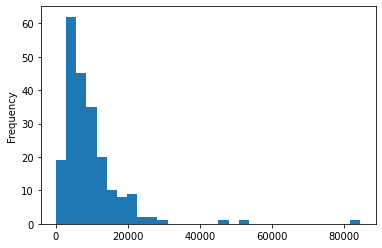

In [9]:
pdfs['chars'].plot.hist(bins=30)

In [10]:
pdfs = pdfs[pdfs['chars']<40000]
pdfs

,link,text,chars
0,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto dal Procuratore ...,23104
1,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: IULIANO NADI...,11176
3,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sui ricorsi proposti da: BORSAN MARIC...,6557
4,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: PATRUNO GIUS...,6112
5,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: HERRERA ARA ...,5251
...,...,...,...
4,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da Mastrogiacomo...,2949
5,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da Aliotta Andre...,5973
6,http://www.italgiure.giustizia.it/xway/applica...,letta la requisitoria del Procuratore Generale...,2723
7,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto dal Procuratore ...,9649


In [11]:
pdfs[pdfs['chars'] <200]

,link,text,chars
14,http://www.italgiure.giustizia.it/xway/applica...,Penale Sent. Sez. 6 Num. 46388 Anno 2021Pre...,124
17,http://www.italgiure.giustizia.it/xway/applica...,Penale Sent. Sez. 6 Num. 46138 Anno 2021Pre...,134
37,http://www.italgiure.giustizia.it/xway/applica...,Penale Sent. Sez. 4 Num. 46416 Anno 2021Pre...,125
65,http://www.italgiure.giustizia.it/xway/applica...,Penale Sent. Sez. 2 Num. 46876 Anno 2021Pre...,130
83,http://www.italgiure.giustizia.it/xway/applica...,Penale Sent. Sez. 4 Num. 46410 Anno 2021Pre...,123
86,http://www.italgiure.giustizia.it/xway/applica...,Penale Sent. Sez. 6 Num. 46135 Anno 2021Pre...,116
99,http://www.italgiure.giustizia.it/xway/applica...,Penale Sent. Sez. 6 Num. 45839 Anno 2021Pre...,120
116,http://www.italgiure.giustizia.it/xway/applica...,Penale Sent. Sez. 3 Num. 46817 Anno 2021Pre...,119
135,http://www.italgiure.giustizia.it/xway/applica...,Penale Sent. Sez. 2 Num. 46758 Anno 2021Pre...,127
140,http://www.italgiure.giustizia.it/xway/applica...,Penale Sent. Sez. 4 Num. 46156 Anno 2021Pre...,124


In [12]:
#Remove the lines that have a short text that correspond to judgments in the darkening phase
pdfs = pdfs[pdfs['chars'] > 200]

In [13]:
pdfs

,link,text,chars
0,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto dal Procuratore ...,23104
1,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: IULIANO NADI...,11176
3,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sui ricorsi proposti da: BORSAN MARIC...,6557
4,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: PATRUNO GIUS...,6112
5,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: HERRERA ARA ...,5251
...,...,...,...
4,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da Mastrogiacomo...,2949
5,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da Aliotta Andre...,5973
6,http://www.italgiure.giustizia.it/xway/applica...,letta la requisitoria del Procuratore Generale...,2723
7,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto dal Procuratore ...,9649


In [24]:
pdfs['subtext'] = pdfs['text'].apply(lambda x: x.replace("'"," "))

pdfs['subtext'] = pdfs['subtext'].apply(lambda x: x[x.find(' 1.')+3: x.find(' 1.') + 500])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
pdfs.to_csv(data_path +'/sentenze_penali_clean.csv', index = False)

In [30]:
df = pd.read_csv(data_path +'/sentenze_penali_clean.csv')
df

,link,text,chars,subtext
0,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto dal Procuratore ...,23104,Con sentenza del 30 novembre 2021 la Corte d ...
1,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: IULIANO NADI...,11176,La Corte di Appello di Campobasso confermava l...
2,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sui ricorsi proposti da: BORSAN MARIC...,6557,"11 Tribunale di Pavia, con sentenza ex art. 44..."
3,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: PATRUNO GIUS...,6112,La Corte di appello di Firenze ha confermato ...
4,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: HERRERA ARA ...,5251,"Il Tribunale di Milano, in riforma della sent..."
...,...,...,...,...
195,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da Mastrogiacomo...,2949,"Francesco Mastrogiaconno, attraverso il propr..."
196,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da Aliotta Andre...,5973,Con ordinanza del 29/7/2021 il Tribunale di C...
197,http://www.italgiure.giustizia.it/xway/applica...,letta la requisitoria del Procuratore Generale...,2723,"Con l ordinanza indicata in epigrafe, emessa ..."
198,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto dal Procuratore ...,9649,Con l ordinanza impugnata il Tribunale di Cag...


### Annotation

Use this web tool https://abera87.github.io/annotate/ from this paper https://arxiv.org/pdf/2108.08184.pdf

First sample

In [34]:
sample_1 = df.head(26)
sample_1

,link,text,chars,subtext
0,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto dal Procuratore ...,23104,Con sentenza del 30 novembre 2021 la Corte d ...
1,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: IULIANO NADI...,11176,La Corte di Appello di Campobasso confermava l...
2,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sui ricorsi proposti da: BORSAN MARIC...,6557,"11 Tribunale di Pavia, con sentenza ex art. 44..."
3,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: PATRUNO GIUS...,6112,La Corte di appello di Firenze ha confermato ...
4,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: HERRERA ARA ...,5251,"Il Tribunale di Milano, in riforma della sent..."
5,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sui ricorsi proposti da: LEVAKOVIC MI...,10392,"La Corte di appello di Perugia, in parziale r..."
6,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: GIUGNO DARIO...,10233,"Dario Giugno, a mezzo del proprio difensore, h..."
7,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: MERLETTI ERC...,6083,Il Giudice di pace di Teramo ha condannato Er...
8,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da Pelle Sebasti...,15108,"Con il provvedimento in epigrafe indicato, la..."
9,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da Parrinello Vi...,20955,Con sentenza del 9 novembre 2021 la Corte di ...


In [33]:
txt = " \n ".join(s.lower() for s in sample_1['subtext'])

In [35]:
ann_file = open("/content/drive/MyDrive/TA_project/progetto_TA/NLP_Anonymization/data/annotation_sample_1.txt", "w")
 
ann_file.write(txt)
 
ann_file.close()

In [ ]:
s1 = pd.read_json(data_path + '/Output.json').head(27)
s1

,SentId,SentText,EntityMentions,RelationMentions
0,0,sentenza sul ricorso proposto dal procuratore ...,"[tiziana casale, giuseppina anna rosaria pacil...","[{'Arg1Text': 'tiziana casale', 'Arg2Text': 't..."
1,1,sentenza sul ricorso proposto da: iuliano nad...,"[difensore, iuliano]","[{'Arg1Text': 'difensore', 'Arg2Text': 'iulian..."
2,2,sentenza sui ricorsi proposti da: borsan mari...,"[difensore, procura generale, borsan, socio]","[{'Arg1Text': 'difensore', 'Arg2Text': 'borsan..."
3,3,sentenza sul ricorso proposto da: patruno giu...,"[corte di appello, difensore, procura generale...","[{'Arg1Text': 'corte di appello', 'Arg2Text': ..."
4,4,sentenza sul ricorso proposto da: herrera ara...,"[pirro antonella, difensore, tribunale di mila...","[{'Arg1Text': 'herrera ara luis', 'Arg2Text': ..."
5,5,sentenza sui ricorsi proposti da: levakovic m...,"[la corte di appello, procura generale, levako...","[{'Arg1Text': 'la corte di appello', 'Arg2Text..."
6,6,sentenza sul ricorso proposto da: giugno dari...,"[difensore, tribunale di brescia, corte territ...","[{'Arg1Text': 'difensore', 'Arg2Text': 'giugno..."
7,7,sentenza sul ricorso proposto da: merletti er...,"[difensore, procura generale, merletti]","[{'Arg1Text': 'difensore', 'Arg2Text': 'merlet..."
8,8,sentenza sul ricorso proposto da pelle sebast...,"[alfredo giovinazzo, francesco saverio fortuna...","[{'Arg1Text': 'alfredo giovinazzo', 'Arg2Text'..."
9,9,sentenza sul ricorso proposto da parrinello v...,"[domenico infantino, difensore, corte di appel...","[{'Arg1Text': 'domenico infantino', 'Arg2Text'..."


Second sample

In [36]:
df = pd.read_csv(data_path +'/sentenze_penali_clean.csv')
sample_2 = df[df.index >26].head(23)
sample_2

,link,text,chars,subtext
27,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: DE ROSA GIUS...,8452,Con ordinanza in data 27 aprile 2021 il Tribu...
28,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: TESTA SILVIO...,4606,Con ricorso straordinario ex art. 625-bis cod...
29,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: TOGNAZZI IVA...,4101,"Con sentenza del 17 dicembre 2020, resa ai se..."
30,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: PROCURATORE ...,3409,Con sentenza del 7 ottobre 2020 il Tribunale ...
31,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: BEN JAFER IS...,8321,La Corte di Appello di Ancona con sentenza de...
32,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: PATTI CALOGE...,8241,La Corte d Appello di Palermo ha rigettato la...
33,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: PALUMBO SAVE...,8722,"Con ordinanza resa il 10 dicembre 2020, la Co..."
34,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: RAMETTA FABR...,9009,"La Corte d appello di Salerno, con ordinanza ..."
35,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sui ricorsi proposti da: PISANIELLO R...,12990,"La Corte d appello di Napoli, in data 27 sett..."
36,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: FERRARA LUIG...,8302,A seguito di annullamento con rinvio disposto...


In [37]:
txt = " \n ".join(s.lower() for s in sample_2['subtext'])

In [38]:
ann_file = open("/content/drive/MyDrive/TA_project/progetto_TA/NLP_Anonymization/data/annotation_sample_2.txt", "w")
 
ann_file.write(txt)
 
ann_file.close()

In [ ]:
s2 = pd.read_json(data_path + '/Output_2.json')
s2

,SentId,SentText,EntityMentions,RelationMentions
0,0,sentenza sul ricorso proposto da: de rosa gius...,"[de rosa, kate, tognozzi, difensore]","[{'Arg1Text': 'kate', 'Arg2Text': 'de rosa', '..."
1,1,sentenza sul ricorso proposto da: testa silvi...,"[testa, difensore, corte di cassazione]","[{'Arg1Text': 'difensore', 'Arg2Text': 'testa'..."
2,2,sentenza sul ricorso proposto da: tognazzi iv...,"[tognazzi, tribunale, difensore]","[{'Arg1Text': 'tribunale', 'Arg2Text': 'tognaz..."
3,3,sentenza sul ricorso proposto da: procuratore...,"[ouriniche, tribunale]","[{'Arg1Text': 'tribunale', 'Arg2Text': 'ourini..."
4,4,sentenza sul ricorso proposto da: ben jafer i...,"[ben jafer, tribunale, difensore]","[{'Arg1Text': 'tribunale', 'Arg2Text': 'ben ja..."
5,5,sentenza sul ricorso proposto da: patti calog...,"[patti, giuseppina fodaroni, corte d'appello]","[{'Arg1Text': 'giuseppina fodaroni', 'Arg2Text..."
6,6,sentenza sul ricorso proposto da: palumbo sav...,"[palumbo, corte d'appello, difensore]","[{'Arg1Text': 'corte d'appello', 'Arg2Text': '..."
7,7,sentenza sul ricorso proposto da: rametta fab...,"[rametta, corte d'appello, difensore]","[{'Arg1Text': 'corte d'appello', 'Arg2Text': '..."
8,8,sentenza sui ricorsi proposti da: pisaniello ...,"[pisaniello, ilario, giaquinto, kate tassone, ...","[{'Arg1Text': 'kate tassone', 'Arg2Text': 'pis..."
9,9,sentenza sul ricorso proposto da: ferrara lui...,"[ferrara, kate tassone, corte d'appello, avv. ...","[{'Arg1Text': 'kate tassone', 'Arg2Text': 'fer..."


thrid sample

In [39]:
df = pd.read_csv(data_path +'/sentenze_penali_clean.csv')
sample_3 = df[df.index >49].head(50)
sample_3

,link,text,chars,subtext
50,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: CARDONE ANTO...,8353,"Antonio Cardone ricorre, a mezzo del proprio ..."
51,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: SOFIA TINDAR...,4556,"Con ordinanza del 19 aprile 2021, la Corte di..."
52,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da Rosus Ioan (C...,4270,Con la sentenza impugnata la Corte d appello ...
53,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da Scuto Salvato...,4897,Con la sentenza impugnata la Corte d appello ...
54,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: DANCI DUMITR...,5940,"1 Con ordinanza in data 11 marzo 2021, il trib..."
55,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sui ricorsi proposti da 1. Pucci Gian...,12265,"Pucci Gianluca, nato a Roma il 23/09/1982 2. ..."
56,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: BERNARDI PAT...,2536,"Con sentenza dell 11/11/2019, la Corte di app..."
57,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: SGUAZZINI SI...,11712,Con decreto del 12 gennaio 2021 il giudice pe...
58,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da HUANG JIANQIU...,12302,Con l impugnata ordinanza il Tribunale di Roma...
59,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: CIAPPINA FRA...,5066,"La Corte di appello di Milano, con ordinanza ..."


In [40]:
txt = " \n ".join(s.lower() for s in sample_3['subtext'])

In [41]:
ann_file = open("/content/drive/MyDrive/TA_project/progetto_TA/NLP_Anonymization/data/annotation_sample_3.txt", "w")
 
ann_file.write(txt)
 
ann_file.close()

In [67]:
s3 = pd.read_json(data_path + '/Output_3.json')
s3

,SentId,SentText,EntityMentions,RelationMentions
0,0,"antonio cardone ricorre, a mezzo del proprio ...","[cardone, difensore, corte d appello]","[{'Arg1Text': 'difensore', 'Arg2Text': 'cardon..."
1,1,"con ordinanza del 19 aprile 2021, la corte d...","[corte di appello, tindaro]","[{'Arg1Text': 'corte di appello', 'Arg2Text': ..."
2,2,con la sentenza impugnata la corte d appello...,"[corte d appello, rosus]","[{'Arg1Text': 'corte d appello', 'Arg2Text': '..."
3,3,con la sentenza impugnata la corte d appello...,"[corte d appello, scuto]","[{'Arg1Text': 'corte d appello', 'Arg2Text': '..."
4,4,"1 con ordinanza in data 11 marzo 2021, il tri...","[dumitru, g.i.p]","[{'Arg1Text': 'g.i.p', 'Arg2Text': 'dumitru', ..."
5,5,"pucci gianluca, nato a roma il 23/09/1982 2....","[pucci, di franco, corte di appello]","[{'Arg1Text': 'corte di appello', 'Arg2Text': ..."
6,6,"con sentenza dell 11/11/2019, la corte di ap...","[bernardi, corte di appello]","[{'Arg1Text': 'corte di appello', 'Arg2Text': ..."
7,7,con decreto del 12 gennaio 2021 il giudice p...,"[biolevano s.r.l., sguazzini, giudice]","[{'Arg1Text': 'giudice', 'Arg2Text': 'biolevan..."
8,8,con l impugnata ordinanza il tribunale di rom...,"[huang, avv. francesco simon]","[{'Arg1Text': 'avv. francesco simon', 'Arg2Tex..."
9,9,"la corte di appello di milano, con ordinanza...","[ciappina, corte di appello]","[{'Arg1Text': 'corte di appello', 'Arg2Text': ..."


In [68]:
s3 = s3[s3['EntityMentions'] != s3['RelationMentions'] ]
s3.reset_index(drop = True, inplace = True)
s3

,SentId,SentText,EntityMentions,RelationMentions
0,0,"antonio cardone ricorre, a mezzo del proprio ...","[cardone, difensore, corte d appello]","[{'Arg1Text': 'difensore', 'Arg2Text': 'cardon..."
1,1,"con ordinanza del 19 aprile 2021, la corte d...","[corte di appello, tindaro]","[{'Arg1Text': 'corte di appello', 'Arg2Text': ..."
2,2,con la sentenza impugnata la corte d appello...,"[corte d appello, rosus]","[{'Arg1Text': 'corte d appello', 'Arg2Text': '..."
3,3,con la sentenza impugnata la corte d appello...,"[corte d appello, scuto]","[{'Arg1Text': 'corte d appello', 'Arg2Text': '..."
4,4,"1 con ordinanza in data 11 marzo 2021, il tri...","[dumitru, g.i.p]","[{'Arg1Text': 'g.i.p', 'Arg2Text': 'dumitru', ..."
5,5,"pucci gianluca, nato a roma il 23/09/1982 2....","[pucci, di franco, corte di appello]","[{'Arg1Text': 'corte di appello', 'Arg2Text': ..."
6,6,"con sentenza dell 11/11/2019, la corte di ap...","[bernardi, corte di appello]","[{'Arg1Text': 'corte di appello', 'Arg2Text': ..."
7,7,con decreto del 12 gennaio 2021 il giudice p...,"[biolevano s.r.l., sguazzini, giudice]","[{'Arg1Text': 'giudice', 'Arg2Text': 'biolevan..."
8,8,con l impugnata ordinanza il tribunale di rom...,"[huang, avv. francesco simon]","[{'Arg1Text': 'avv. francesco simon', 'Arg2Tex..."
9,9,"la corte di appello di milano, con ordinanza...","[ciappina, corte di appello]","[{'Arg1Text': 'corte di appello', 'Arg2Text': ..."


In [69]:
data_annotated = s3

In [ ]:
data_annotated = pd.concat([s1,s2])
data_annotated.reset_index(inplace = True,drop= True)
data_annotated

,SentId,SentText,EntityMentions,RelationMentions
0,0,sentenza sul ricorso proposto dal procuratore ...,"[tiziana casale, giuseppina anna rosaria pacil...","[{'Arg1Text': 'tiziana casale', 'Arg2Text': 't..."
1,1,sentenza sul ricorso proposto da: iuliano nad...,"[difensore, iuliano]","[{'Arg1Text': 'difensore', 'Arg2Text': 'iulian..."
2,2,sentenza sui ricorsi proposti da: borsan mari...,"[difensore, procura generale, borsan, socio]","[{'Arg1Text': 'difensore', 'Arg2Text': 'borsan..."
3,3,sentenza sul ricorso proposto da: patruno giu...,"[corte di appello, difensore, procura generale...","[{'Arg1Text': 'corte di appello', 'Arg2Text': ..."
4,4,sentenza sul ricorso proposto da: herrera ara...,"[pirro antonella, difensore, tribunale di mila...","[{'Arg1Text': 'herrera ara luis', 'Arg2Text': ..."
5,5,sentenza sui ricorsi proposti da: levakovic m...,"[la corte di appello, procura generale, levako...","[{'Arg1Text': 'la corte di appello', 'Arg2Text..."
6,6,sentenza sul ricorso proposto da: giugno dari...,"[difensore, tribunale di brescia, corte territ...","[{'Arg1Text': 'difensore', 'Arg2Text': 'giugno..."
7,7,sentenza sul ricorso proposto da: merletti er...,"[difensore, procura generale, merletti]","[{'Arg1Text': 'difensore', 'Arg2Text': 'merlet..."
8,8,sentenza sul ricorso proposto da pelle sebast...,"[alfredo giovinazzo, francesco saverio fortuna...","[{'Arg1Text': 'alfredo giovinazzo', 'Arg2Text'..."
9,9,sentenza sul ricorso proposto da parrinello v...,"[domenico infantino, difensore, corte di appel...","[{'Arg1Text': 'domenico infantino', 'Arg2Text'..."


In [70]:
data_annotated.drop('SentId',axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
data_annotated.iloc[4]['RelationMentions'] = data_annotated.iloc[4]['RelationMentions'][1:]

In [ ]:
data_annotated.iloc[4]['RelationMentions']

[{'Arg1Text': 'difensore',
  'Arg2Text': 'herrera ara',
  'RelationNames': ['/difende/avvocato/cliente']},
 {'Arg1Text': 'tribunale di milano',
  'Arg2Text': 'herrera ara',
  'RelationNames': ['/giudica/giudice/imputato']}]

In [71]:
def remove_repetition(lista):
    lista_new = []
    for x in lista:
        contenuto = []
        for s in lista:
            if x != s:
                contenuto.append(x in s)
        if not (True in contenuto):
            lista_new.append(x)
    return lista_new

In [ ]:
remove_repetition(data_annotated.iloc[13]['EntityMentions'])

['sclafani', 'corte di appello', 'difensore']

In [72]:
data_annotated['EntityMentions'] = data_annotated['EntityMentions'].apply(remove_repetition)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [73]:
data_annotated

,SentText,EntityMentions,RelationMentions
0,"antonio cardone ricorre, a mezzo del proprio ...","[cardone, difensore, corte d appello]","[{'Arg1Text': 'difensore', 'Arg2Text': 'cardon..."
1,"con ordinanza del 19 aprile 2021, la corte d...","[corte di appello, tindaro]","[{'Arg1Text': 'corte di appello', 'Arg2Text': ..."
2,con la sentenza impugnata la corte d appello...,"[corte d appello, rosus]","[{'Arg1Text': 'corte d appello', 'Arg2Text': '..."
3,con la sentenza impugnata la corte d appello...,"[corte d appello, scuto]","[{'Arg1Text': 'corte d appello', 'Arg2Text': '..."
4,"1 con ordinanza in data 11 marzo 2021, il tri...","[dumitru, g.i.p]","[{'Arg1Text': 'g.i.p', 'Arg2Text': 'dumitru', ..."
5,"pucci gianluca, nato a roma il 23/09/1982 2....","[pucci, di franco, corte di appello]","[{'Arg1Text': 'corte di appello', 'Arg2Text': ..."
6,"con sentenza dell 11/11/2019, la corte di ap...","[bernardi, corte di appello]","[{'Arg1Text': 'corte di appello', 'Arg2Text': ..."
7,con decreto del 12 gennaio 2021 il giudice p...,"[biolevano s.r.l., sguazzini, giudice]","[{'Arg1Text': 'giudice', 'Arg2Text': 'biolevan..."
8,con l impugnata ordinanza il tribunale di rom...,"[huang, avv. francesco simon]","[{'Arg1Text': 'avv. francesco simon', 'Arg2Tex..."
9,"la corte di appello di milano, con ordinanza...","[ciappina, corte di appello]","[{'Arg1Text': 'corte di appello', 'Arg2Text': ..."


I have to replace avv. with avv

In [74]:
def remove_points_from_relations(relations):
    rel_list = []
    for rel in relations:
        rel['Arg1Text'] = rel['Arg1Text'].replace("'"," ")
        rel['Arg2Text'] = rel['Arg2Text'].replace("'"," ")
        rel_list.append(rel)
    return rel_list

In [75]:
data_annotated['EntityMentions'] = data_annotated['EntityMentions'].apply(lambda row: [e.replace("'"," ") for e in row])
data_annotated['SentText'] = data_annotated['SentText'].apply(lambda x: x.replace("'"," "))
data_annotated['RelationMentions'] = data_annotated['RelationMentions'].apply(remove_points_from_relations)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [76]:
data_annotated['SentText'] = data_annotated['SentText'].apply(lambda x: x.lstrip())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [77]:
#data_annotated = data_annotated.drop(index=23).reset_index(drop = True)
data_annotated

,SentText,EntityMentions,RelationMentions
0,"antonio cardone ricorre, a mezzo del proprio d...","[cardone, difensore, corte d appello]","[{'Arg1Text': 'difensore', 'Arg2Text': 'cardon..."
1,"con ordinanza del 19 aprile 2021, la corte di ...","[corte di appello, tindaro]","[{'Arg1Text': 'corte di appello', 'Arg2Text': ..."
2,con la sentenza impugnata la corte d appello d...,"[corte d appello, rosus]","[{'Arg1Text': 'corte d appello', 'Arg2Text': '..."
3,con la sentenza impugnata la corte d appello d...,"[corte d appello, scuto]","[{'Arg1Text': 'corte d appello', 'Arg2Text': '..."
4,"1 con ordinanza in data 11 marzo 2021, il trib...","[dumitru, g.i.p]","[{'Arg1Text': 'g.i.p', 'Arg2Text': 'dumitru', ..."
5,"pucci gianluca, nato a roma il 23/09/1982 2. d...","[pucci, di franco, corte di appello]","[{'Arg1Text': 'corte di appello', 'Arg2Text': ..."
6,"con sentenza dell 11/11/2019, la corte di appe...","[bernardi, corte di appello]","[{'Arg1Text': 'corte di appello', 'Arg2Text': ..."
7,con decreto del 12 gennaio 2021 il giudice per...,"[biolevano s.r.l., sguazzini, giudice]","[{'Arg1Text': 'giudice', 'Arg2Text': 'biolevan..."
8,con l impugnata ordinanza il tribunale di roma...,"[huang, avv. francesco simon]","[{'Arg1Text': 'avv. francesco simon', 'Arg2Tex..."
9,"la corte di appello di milano, con ordinanza d...","[ciappina, corte di appello]","[{'Arg1Text': 'corte di appello', 'Arg2Text': ..."


In [ ]:
data_annotated.iloc[0]['SentText'][:data_annotated.iloc[0]['SentText'].find(". 2. ")]

'sentenza sul ricorso proposto da: cardone antonio nato a melfi il 19/11/1990 avverso la sentenza del 19/06/2020 della corte appello di potenza visti gli atti, il provvedimento impugnato e il ricorso; udita la relazione svolta dal consigliere giuseppe pavich; lette le conclusioni del pubblico ministero, in persona del sostituto procuratore generale giulio romano penale sent. sez. 4   num. 46161  anno 2021presidente: di salvo emanuelerelatore: pavich giuseppedata udienza: 09/12/2021ritenuto in fatto 1. antonio cardone ricorre, a mezzo del proprio difensore di fiducia, avverso la sentenza con la quale, il 19 giugno 2020, la corte d appello di potenza ha confermato la condanna emessa a suo carico dal tribunale potentino il 15 gennaio 2019, avendolo dichiarato responsabile del delitto p. e p. dall art. 73 d.p.r. 309/1990, accertato in lavello il 28 luglio 2018, con la recidiva specifica reiterata nel quinquennio. al cardone si addebita in particolare la detenzione, nell armadio della sua c

In [78]:
import re

def clean_sentence(text):

    text = text.replace('sent.', '')
    text = text.replace('num.', '')
    text = text.replace('sez.', '')
    text = text.replace('p. e p.', '')
    text = text.replace('art.', '')
    text = text.replace('artt.', '')
    text = text.replace('d.p.r', '')


    text = re.sub(' +', ' ',text)
    return text


In [79]:
data_annotated['SentText'].apply(clean_sentence)[7]

'con decreto del 12 gennaio 2021 il giudice per le indagini preliminari del tribunale di pavia disponeva il sequestro preventivo dei beni in danno della società biolevano s.r.l. fino alla concorrenza della somma di • 143.321.004,00, in vista della successiva confisca diretta del reato e, solo qualora la confisca diretta non fosse stata possibile per mancata e/o inferiore provvista, il sequestro preventivo per equivalente dei beni di tutti gli indagati, compreso sguazzini simone, indagato per '

In [80]:
data_annotated.to_json(data_path +'/manually_annotated_dataset.json')

In [94]:
data_annotated = pd.read_json(data_path +'/manually_annotated_dataset.json')

In [ ]:
data_annotated.iloc[0]['RelationMentions']

[{'Arg1Text': 'corte d appello',
  'Arg2Text': 'cardone',
  'RelationNames': ['/giudica/giudice/imputato']},
 {'Arg1Text': 'difensore',
  'Arg2Text': 'cardone',
  'RelationNames': ['/difende/avvocato/cliente']}]

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
train_annotated, dev_test = train_test_split(data_annotated, test_size=0.3)
dev_annotated, test_annotated = train_test_split(dev_test, test_size=0.5)

I have to convert this dataframe into a tsv file

In [97]:
import re
def pad(text):
    text = re.sub("([.,!?(')])", r' \1 ', text)
    text = re.sub('\s{2,}', ' ', text)
    return text

In [98]:
def get_tokens(text):
    tokens = pad(text).split(' ')
    return tokens

In [99]:
def nearest_entities(text, e1, e2):
    occ1 = [i for i in range(len(text)) if text.startswith(e1 , i)]
    occ2 = [i for i in range(len(text)) if text.startswith(e2, i)]
    
    minimum = len(text)
    indexes = (0,0)

    for i1,v1 in enumerate(occ1):
        for i2,v2 in enumerate(occ2):
            if abs(v1-v2) < minimum:
                minimum = abs(v1-v2)
                
                indexes = (i1,i2)
    tok_list = get_tokens(text)
    occ1_tokens = []
    for i,x in enumerate(tok_list):
        if len(get_tokens(e1)) == 1:
            if x == get_tokens(e1)[0]:
                occ1_tokens.append(i)
        elif len(get_tokens(e1)) == 2:
            if x == get_tokens(e1)[0] and tok_list[i+1] == get_tokens(e1)[1]:
                occ1_tokens.append(i)
        else:
            if x == get_tokens(e1)[0] and tok_list[i+1] == get_tokens(e1)[1] and tok_list[i+2] == get_tokens(e1)[2]:
                occ1_tokens.append(i)
    occ2_tokens = []
    for i,x in enumerate(tok_list):
        if len(get_tokens(e2)) == 1:
            if x == get_tokens(e2)[0]:
                occ2_tokens.append(i)
        elif len(get_tokens(e2)) == 2:
            if x == get_tokens(e2)[0] and tok_list[i+1] == get_tokens(e2)[1]:
                occ2_tokens.append(i)
        else:
            if x == get_tokens(e2)[0] and tok_list[i+1] == get_tokens(e2)[1] and tok_list[i+2] == get_tokens(e2)[2]:
                occ2_tokens.append(i)
    return occ1[indexes[0]], occ2[indexes[1]], occ1_tokens[indexes[0]], occ2_tokens[indexes[1]]

In [100]:
def create_dict(df_row):
    tokens_list = get_tokens(df_row['SentText'])
    text = df_row['SentText']
    diz = {"document" : text,
           "tokens": [],
           "relations" : []}
    entities_list = []
    for rel in df_row['RelationMentions']:
        entity_1 = rel['Arg1Text']
        entity_2 = rel['Arg2Text']
        if entity_1 not in text or entity_2 not in text:
            continue
         
        tupla = nearest_entities(text, entity_1, entity_2)
        #print(tupla)


        if entity_1 not in df_row['EntityMentions']:
            continue
        ent1_diz = {"text": entity_1,
                                "start": tupla[0],
                                "end": tupla[0] + len(entity_1),
                                "token_start": tupla[2],
                                "token_end": tupla[2] + len(get_tokens(entity_1)) -1,
                                "entityLabel": rel['RelationNames'][0].split('/')[2].upper()}
        
        

        ent2_diz = {"text": entity_2,
                                "start": tupla[1],
                                "end": tupla[1] + len(entity_2),
                                "token_start": tupla[3],
                                "token_end": tupla[3] + len(get_tokens(entity_2)) -1,
                                "entityLabel": 'IMPUTATO'}
        diz['relations'].append({ "child": ent2_diz["token_start"], "head": ent1_diz["token_start"], "relationLabel": rel['RelationNames'][0].split('/')[1].upper() })
        if ent2_diz not in diz['tokens']:
            diz['tokens'].append(ent2_diz)
        if ent1_diz not in diz['tokens']:

            diz['tokens'].append(ent1_diz)
            
            

        
        
        
    return diz

In [88]:
for i in range(data_annotated.shape[0]):
    try:
        create_dict(data_annotated.iloc[i])
    except:
        print(i)

In [101]:
import json
def transform_json(df,filename):
    output = []
    for i in range(df.shape[0]):
        output.append(create_dict(df.iloc[i]))
    with open(data_path + f'/{filename}.txt', 'w') as fout:
        json.dump(output, fout)


In [90]:
transform_json(data_annotated, 'prova')

In [91]:
df = pd.read_json(data_path +'/prova.txt')

In [ ]:
df.iloc[44]['document']

'sentenza sul ricorso proposto da farjallah hamdi, nato in tunisia il 17 agosto 1983 avverso la sentenza della corte di appello di ancona del 17 ottobre 2019 visti gli atti, il provvedimento impugnato e il ricorso; udita la relazione svolta dal consigliere benedetto paternò raddusa; letta la requisitoria del pubblico ministero, in persona del procuratore generale luigi orsi, che ha concluso per l annullamento della sentenza impugnata con rinvio per nuovo giudizio ritenuto in fatto 1. farjallah hamdí, tramite.-  il difensore di fiducia, impugna la sentenza descritta in epigrafe con la quale è stata confermata la condanna del predetto alla pena ritenuta di giustizia, applicata in suo danno dal tribunale di macerata in esito penale sent. sez. 6   num. 47224  anno 2021presidente: fidelbo giorgiorelatore: paterno  raddusa benedettodata udienza: 26/11/2021a giudizio abbreviato, alla luce della ritenuta responsabilità per il reato di cui all art 73 comma 5 d.p.r. n. 309 del 1990 allo stesso a

In [92]:
distances = []
for i in range(df.shape[0]):
    for diz in df.iloc[i]['relations']:
        m = abs(diz['head'] - diz['child'])
        distances.append(m)
print(distances)
print(max(distances))

[7, 11, 15, 15, 34, 25, 15, 44, 19, 79, 26, 36, 23, 27, 2, 27, 17, 22, 61, 5, 5, 40, 21, 5, 23, 14, 8, 19, 7, 6, 24, 60, 20, 11, 70, 60, 50, 10, 8, 15, 10, 3, 8, 12, 7, 17, 15, 3, 6, 32, 16, 30, 17]
79


In [102]:
transform_json(train_annotated, 'relation_training')
transform_json(test_annotated, 'relation_test')
transform_json(dev_annotated, 'relation_dev')

In [103]:
import json


from pathlib import Path

from spacy.tokens import Span, DocBin, Doc
from spacy.vocab import Vocab
from wasabi import Printer
from spacy.tokenizer import Tokenizer
#from spacy.lang.en import English
from spacy.util import compile_infix_regex
import re
import spacy

nlp = spacy.blank("it")
# Create a blank Tokenizer with just the English vocab

msg = Printer()

SYMM_LABELS = ["Binds"]
MAP_LABELS = {
    "DIFENDE": "DIFENDE",
    "GIUDICA": "GIUDICA"
}


def main(json_loc: Path, output_file: Path):
    """Creating the corpus from the Prodigy annotations."""
    Doc.set_extension("rel", default={},force=True)
    vocab = Vocab()

    docs = {"train": [], "dev": [], "test": [], "total": []}
    ids = {"train": set(), "dev": set(), "test": set(), "total":set()}
    count_all = {"train": 0, "dev": 0, "test": 0,"total": 0}
    count_pos = {"train": 0, "dev": 0, "test": 0,"total": 0}

    with open(json_loc, encoding="utf8") as jsonfile:
        file = json.load(jsonfile)
        i = 0
        for example in file:
            span_starts = set()
            neg = 0
            pos = 0
                    # Parse the tokens
            tokens=nlp(example["document"])    

            spaces=[]
            spaces = [True if tok.whitespace_ else False for tok in tokens]
            words = [t.text for t in tokens]
            doc = Doc(nlp.vocab, words=words, spaces=spaces)


            # Parse the GGP entities
            spans = example["tokens"]
            entities = []
            span_end_to_start = {}
            for span in spans:
                entity = doc.char_span(
                     span["start"], span["end"], label=span["entityLabel"]
                 )
                

                span_end_to_start[span["token_start"]] = span["token_start"]
                #print(span_end_to_start)
                entities.append(entity)
                span_starts.add(span["token_start"])
            print(entities)
            doc.ents = entities
            print(i)
            i += 1

            # Parse the relations
            rels = {}
            for x1 in span_starts:
                for x2 in span_starts:
                    rels[(x1, x2)] = {}
                    #print(rels)
            relations = example["relations"]
            #print(len(relations))
            for relation in relations:
                # the 'head' and 'child' annotations refer to the end token in the span
                # but we want the first token
                start = span_end_to_start[relation["head"]]
                end = span_end_to_start[relation["child"]]
                label = relation["relationLabel"]
                #print(rels[(start, end)])
                #print(label)
                #label = MAP_LABELS[label]
                if label not in rels[(start, end)]:
                    rels[(start, end)][label] = 1.0
                    pos += 1
                    #print(pos)
                    #print(rels[(start, end)])

            # The annotation is complete, so fill in zero's where the data is missing
            for x1 in span_starts:
                for x2 in span_starts:
                    for label in MAP_LABELS.values():
                        if label not in rels[(x1, x2)]:
                            neg += 1
                            rels[(x1, x2)][label] = 0.0

                            #print(rels[(x1, x2)])
            doc._.rel = rels
            #print(doc._.rel)

            # only keeping documents with at least 1 positive case
            if pos > 0:
                    docs["total"].append(doc)
                    count_pos["total"] += pos
                    count_all["total"] += pos + neg

                    
                    
    #print(len(docs["total"]))
    docbin = DocBin(docs=docs["total"], store_user_data=True)
    docbin.to_disk(output_file)
    msg.info(
        f"{len(docs['total'])} training sentences"
    )
    print(docs)

In [ ]:
prova_out = data_path + '/relations_prova.spacy'

In [104]:
train_file = data_path + '/train.spacy'
dev_file = data_path + '/dev.spacy'
test_file = data_path + '/test.spacy'

In [105]:
main(data_path + '/prova.txt', prova_out)

NameError: ignored

In [106]:
main(data_path +'/relation_test.txt', test_file)

[maiuri, difensore]
0
[hamdí, difensore]
1
[sad, corte di appello]
2
[bruno varacalli, difensore]
3
[coppola, tribunale]
4
[nwabanne, gip]
5
[tindaro, corte di appello]
6
[viola gennaro, corte di appello, viola antonio]
7
ℹ 8 training sentences
{'train': [], 'dev': [], 'test': [], 'total': [il difensore di raffaele maiuri propone ricorso avverso l ordinanza in epigrafe con la quale il tribunale del riesame di catania ha respinto l appello proposto avverso il provvedimento reiettivo dell istanza di sostituzione della misura custodiale, applicata dal g.i.p. del medesimo tribunale per i reati di cui agli artt. 74 e 73 d.p.r. 309 del 90, con arresti domiciliari presso una comunità terapeutica di mazara del vallo ai sensi dell art. 89 del medesimo d.p.r. con il primo motivo deduce l , farjallah hamdí, tramite.-  il difensore di fiducia, impugna la sentenza descritta in epigrafe con la quale è stata confermata la condanna del predetto alla pena ritenuta di giustizia, applicata in suo danno d

In [107]:
main(data_path +'/relation_dev.txt', dev_file)

[carta, tribunale]
0
[schiavone, corte di appello]
1
[trapani, corte d appello]
2
[hrustic, tribunale]
3
[pucci, corte di appello, di franco]
4
[federico, ciro angelillis, femia, hicham]
5
[forino, corte di appello]
6
ℹ 7 training sentences
{'train': [], 'dev': [], 'test': [], 'total': [con l ordinanza sopra indicata il tribunale di sassari, adito ai sensi dell art. 310 cod. proc. pen., confermava il provvedimento del 21 maggio 2001 con il quale il giudice per le indagini preliminari del tribunale di tempio pausania aveva disposto l applicazione della misura interdittiva della sospensione di pubblico servizio nei riguardi di aldo carta, previa riqualificazione giuridica dei fatti originariamente contestati con due distinte imputazioni provvisorie. penale sent. sez. 6   num. , con ordinanza del 4 maggio 2021, la corte di appello di napoli, in funzione di giudice dell esecuzione, rigettava la richiesta depositata in data 2.12.2019 dalla difesa di schiavone isidoro (terzo interessato), te

In [108]:
main(data_path +'/relation_training.txt', train_file)

[angelo pirrotta, corte di appello, michele pirrotta]
0
[kasmi, difensori]
1
[bernardi, corte di appello]
2
[cardone, difensore]
3
[biolevano s.r.l., giudice, sguazzini]
4
[spina, avvocato cristian cristiano]
5
[di paolo, difensore]
6
[hoxha, difensore]
7
[rosus, corte d appello]
8
[tondo, gip]
9
[boka, difensore]
10
[dumitru, g.i.p]
11
[napoli, difensore]
12
[svizzero, corte di appello]
13
[voroneanu, suprema corte]
14
[ticchione, tribunale]
15
[garibay tamayo, tribunale]
16
[di giacinto, tribunale]
17
[scuto, corte d appello]
18
[hasan, corte di appello]
19
[huang, avv. francesco simon]
20
[volpe, tribunale]
21
[miniaci, difensore]
22
[rainone, giudice]
23
[romano, giudice]
24
[greco, difensore]
25
[ben, tribunale]
26
[sclafani, corte di appello]
27
[ciappina, corte di appello]
28
[silipigni, tribunale]
29
[ndiaye, difensore]
30
[fryganiotis, corte di appello]
31
ℹ 32 training sentences
{'train': [], 'dev': [], 'test': [], 'total': [la corte di appello di palermo, in parziale riforma

## Sentenze Giustizia Ammnistrativa
https://www.giustizia-amministrativa.it/web/guest/dcsnprr

In [ ]:
htmls = pd.read_csv(data_path +'/sentenze_html.csv')
htmls

In [ ]:
htmls['text'].nunique()